# Project 5DEEP (Deep Learning) 
### Hugo Huygens - Matteo Gora

## Sommaire

- Cahier des charges
- Imports
- Charger les données et les transformer en images de 28 x 28 pixels
   - Séparation des labels et des caractéristiques
   - Normalisation et Restructuration des Données
   - Affichage des dimensions des jeux de données
   - Visualisation des Images du Dataset
- Ce dataset est-il équilibré ? Est-il nécessaire de rééquilibrer les données ? Le faire si besoin est
   - Rééquilibrage des Classes sous-représentées
- Construire un réseau de neurones convolutif
- Entraîner le modèle
- Faire une recherche de meilleurs hyperparamètres avec GridSearchCV
- Utiliser une technique d'augmentation d'images
- Sauvegarder votre meilleur modèle
- Utiliser votre meilleur modèle avec des photos prises pour l'occasion
- Choisir un des modèles pré-entrainés disponible avec Keras


## Cahier des charges

Vous devez télécharger et utiliser les jeux de données suivant : train et test (source : Kaggle).

Les données sont des images représentant les lettres de l'alphabet en langue des signes. Les classes indexées de 0 à 25 représentent les lettres de A à Z. À noter qu'il n'y a pas de données pour les lettres J et Z (car on ne les représente pas par des signes statiques mais par des mouvements).

Vous devrez développer "from scratch" vos propres réseaux de neurones pour résoudre ce problème de classification. Utiliser un modèle pré-entrainé n'est autorisé que dans la question correspondante.

Votre rendu se fera sous la forme d'un archive au format .zip contenant un notebook Jupyter (code source), son export au format PDF (ou HTML) ainsi qu'une sauvegarde de votre modèle final. Tout projet ne comportant pas ces trois éléments sera ajourné sans contestation possible.

Toutes les étapes de votre projet devront être commentées et justifiées. Tous les résultats devront être interprétés. La qualité de la rédaction (style, grammaire et orthographe) sera prise en compte. Un rendu professionnel est attendu.

L'usage de Python et de la librairie Tensorflow est obligatoire.

Charger les données et les transformer en images de 28 x 28 pixels.
Ce dataset est-il équilibré ? Est-il nécessaire de rééquilibrer les données ? Le faire si besoin est.
Construire un réseau de neurones convolutif pour résoudre ce problème de classification. Il devra contenir au minimum les éléments suivants : couches de convolution, couche de "pooling", "dropout", couches cachées complètement connectées. Vous êtes libres d'ajouter d'autres éléments.
Entraîner le modèle construit à la question précédente et mesurer sa performance.
Faire une recherche de meilleurs hyperparamètres avec la fonction "GridSearchCV“.
Utiliser une technique d'augmentation d'images. Les résultats de vos modèles s'en trouvent-ils améliorés ? Était-ce prévisible ?
Sauvegarder votre meilleur modèle.
Utiliser votre meilleur modèle avec des photos prises pour l'occasion où vous représenterez différents signes.
Choisir un des modèles pré-entrainés disponible avec Keras. Le charger et le personnaliser avec des couches de convolution et complètement connectées. L'entraîner et mesurer sa performance. La comparer avec celles de votre meilleur modèle.

## Imports

### Importation des librairies

Pour réaliser notre projet nous avons du installer toute ces librairies. Vous pouvez installer toute les librairies python en faisant la commande `sh ./install-packages.sh` (Attention a prendre le bon noyau python au lancement du projet)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import resample
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers, models
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from keras.applications import MobileNetV2

### Importation des datasets

In [2]:
train_data = pd.read_csv('./datasets/sign_mnist_train.csv')
test_data = pd.read_csv('./datasets/sign_mnist_test.csv')

## Charger les données et les transformer en images de 28 x 28 pixels

### Séparation des labels et des caractéristiques


In [3]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

Dans cette partie, nous avons séparé les images des lettres de leurs étiquettes.
- X_train et X_test contiennent les images elles-mêmes, après avoir retiré la colonne 'label', qui indique à quelle lettre correspond chaque image.
- y_train et y_test regroupent ces étiquettes, c’est-à-dire les lettres que chaque image représente.
Cela nous permet d'entraîner notre modèle en lui donnant uniquement les images (X) comme entrée, tout en lui permettant d’apprendre à associer ces images aux bonnes lettres (y).

### Normalisation et Restructuration des Données

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Dans cette étape, nous avons effectué deux transformations clés :

- Normalisation des images : Nous avons divisé les valeurs des pixels par 255 pour les ramener dans l'intervalle [0, 1]. Cela permet au réseau de neurones de traiter des valeurs plus petites et plus uniformes, ce qui accélère l'apprentissage et améliore la stabilité du modèle.

- Restructuration des données : Les images ont été redimensionnées avec la commande reshape(-1, 28, 28, 1). Cela signifie que nous avons converti chaque image en un tableau 3D de 28 x 28 pixels, avec 1 canal (car ce sont des images en niveaux de gris). Le -1 permet de conserver la dimension du nombre total d'échantillons.

### Affichage des dimensions des jeux de données

In [5]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (27455, 28, 28, 1)
Test data shape: (7172, 28, 28, 1)


### Visualisation des Images du Dataset

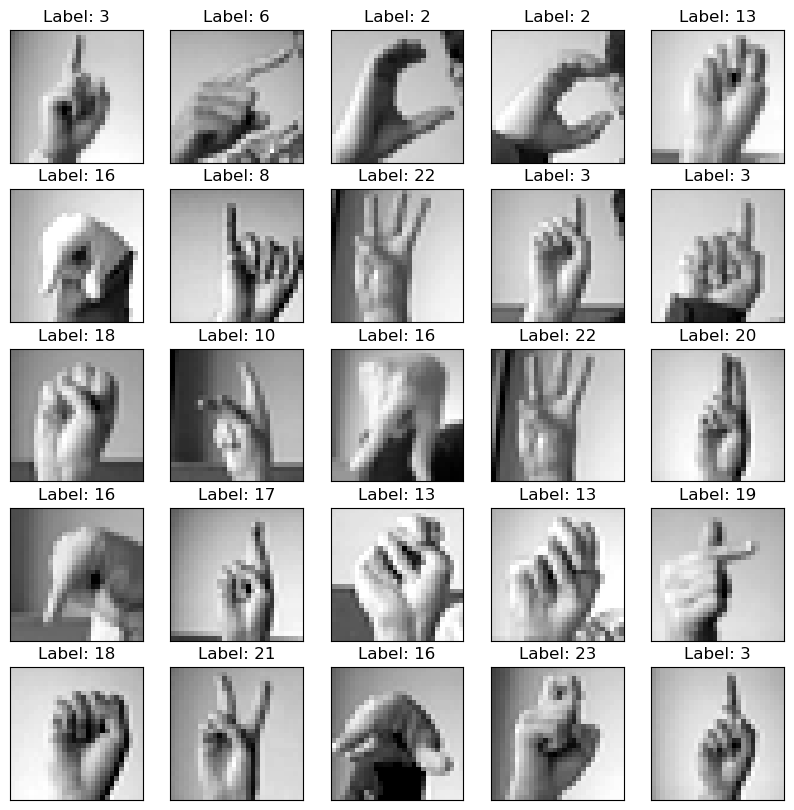

In [6]:
def display_images(data, labels, batch_size=25, start_index=0):
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[start_index + i], cmap='gray')
        plt.title(f"Label: {labels[start_index + i]}")
    plt.show()

display_images(X_train, y_train, batch_size=25, start_index=0)

Dans cette fonction, nous avons créé un outil de visualisation des images du dataset avec leurs étiquettes correspondantes. Cette visualisation est utile pour inspecter rapidement les données d'entraînement et vérifier qu'elles sont bien importées et prétraitées.

## Ce dataset est-il équilibré ? Est-il nécessaire de rééquilibrer les données ? Le faire si besoin est.

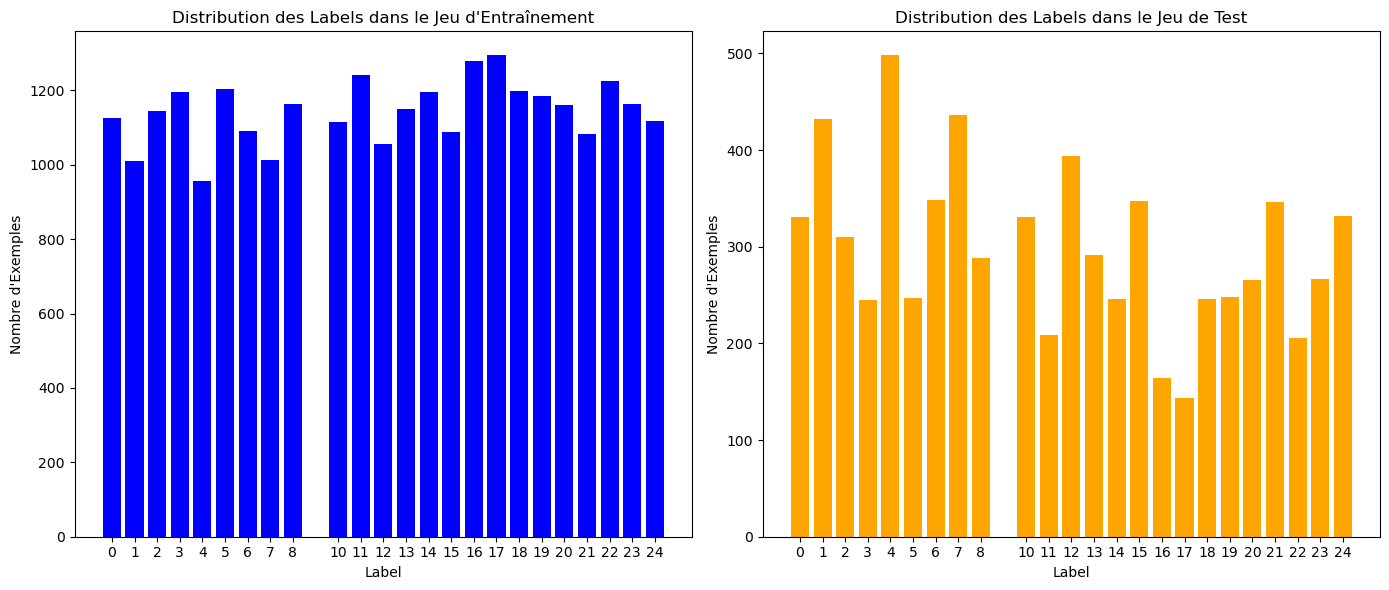

In [7]:
test_label_distribution = test_data['label'].value_counts()
train_label_distribution = train_data['label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Distribution des labels dans le jeu d'entraînement
axs[0].bar(train_label_distribution.index, train_label_distribution.values, color='blue')
axs[0].set_title('Distribution des Labels dans le Jeu d\'Entraînement')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Nombre d\'Exemples')
axs[0].set_xticks(train_label_distribution.index)

# Distribution des labels dans le jeu de test
axs[1].bar(test_label_distribution.index, test_label_distribution.values, color='orange')
axs[1].set_title('Distribution des Labels dans le Jeu de Test')
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Nombre d\'Exemples')
axs[1].set_xticks(test_label_distribution.index)

plt.tight_layout()
plt.show()


En observant les graphiques, on remarque que le jeu d'entraînement présente une distribution relativement équilibrée des labels. Les écarts entre les classes sont minimes. Cela suggère qu'il n'y a pas de déséquilibre important dans le jeu d'entraînement, et qu'il n'est pas nécessaire d'appliquer des techniques de rééquilibrage à ce stade.

En revanche, dans le jeu de test, il existe des écarts plus significatifs. Par exemple, certaines classes, comme la classe '4', ont près de 500 exemples, tandis que d'autres, comme les classes '17' et '16', en ont moins de 150. Cela signifie que certaines classes sont sous-représentées dans le jeu de test, ce qui pourrait influencer les performances du modèle lors de l'évaluation, en particulier pour ces classes avec moins d'exemples.

En conclusion, bien que le jeu d'entraînement soit assez bien équilibré, le jeu de test montre un certain déséquilibre. Cependant, ce déséquilibre ne nécessite pas de rééquilibrage, car nous n'entraînons pas sur ce jeu, mais nous allons quand même faire un équilibrage pour le jeu de test.

### Rééquilibrage des Classes sous-représentées

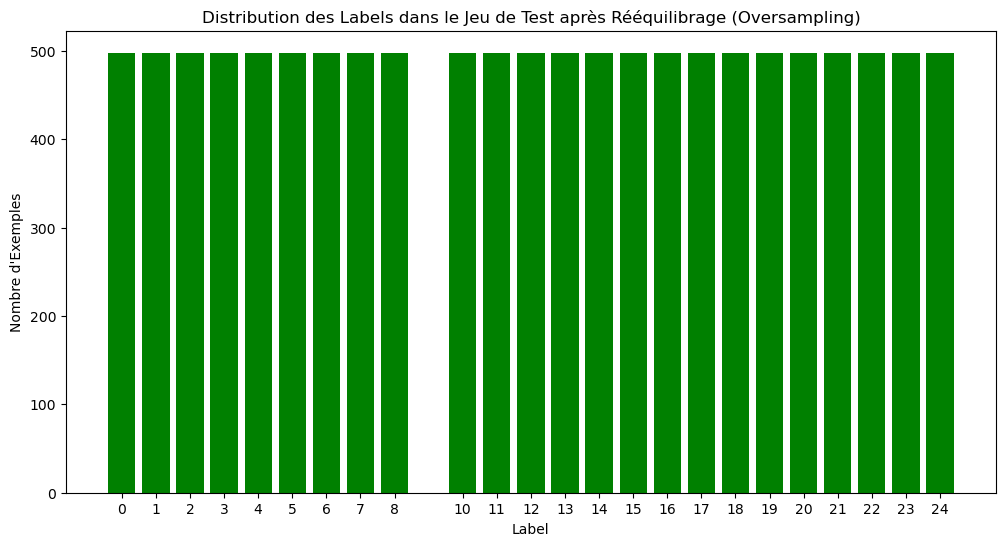

In [8]:
# Trouver le nombre maximal d'exemples dans une classe
max_samples = test_data['label'].value_counts().max()

# Listes pour stocker les données équilibrées
df_list = []

# Pour chaque classe, augmenter les exemples sous-représentés en utilisant le sur-échantillonnage
for label, group in test_data.groupby('label'):
    if len(group) < max_samples:
        # Sur-échantillonnage des classes sous-représentées
        df_list.append(resample(group, replace=True, n_samples=max_samples, random_state=42))
    else:
        # Garder les classes déjà majoritaires telles quelles
        df_list.append(group)

# Combiner toutes les données resélectionnées
test_data_balanced = pd.concat(df_list)

# Vérifier la nouvelle distribution des labels après équilibrage
test_label_distribution_balanced = test_data_balanced['label'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(test_label_distribution_balanced.index, test_label_distribution_balanced.values, color='green')
plt.title('Distribution des Labels dans le Jeu de Test après Rééquilibrage (Oversampling)')
plt.xlabel('Label')
plt.ylabel('Nombre d\'Exemples')
plt.xticks(test_label_distribution_balanced.index)
plt.show()

Pour traiter le déséquilibre observé dans le jeu de test, nous avons appliqué une méthode de sur-échantillonnage aux classes sous-représentées. L'objectif était de faire correspondre le nombre d'exemples de chaque classe à celui de la classe la plus représentée.

In [9]:
X_test_balanced = test_data_balanced.drop('label', axis=1).values
y_test_balanced = test_data_balanced['label'].values

X_test_balanced = X_test_balanced / 255.0
X_test_balanced = X_test_balanced.reshape(-1, 28, 28, 1)

Désormais, pour évaluer les performances du modèle de manière plus homogène entre les classes, nous allons utiliser ce nouveau jeu de test rééquilibré. Les caractéristiques et étiquettes seront extraites de test_data_balanced en tant que X_test_balanced et y_test_balanced, et ces données seront utilisées pour l'évaluation finale du modèle.

## Construire un réseau de neurones convolutif

In [10]:
def create_cnn_model(input_shape=(28, 28, 1), num_classes=25, optimizer='adam', dropout_rate=0.5, neurons=128):
    model = models.Sequential()

    model.add(Input(shape=input_shape))
    
    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Flatten and fully connected layers
    model.add(layers.Flatten())

    # Dense layer with customizable number of neurons and regularization (optional)
    model.add(layers.Dense(neurons, activation='relu'))

    # Dropout layer
    model.add(layers.Dropout(dropout_rate))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

cnn_model = create_cnn_model()
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,825 (518.85 KB)

 Trainable params: 132,825 (518.85 KB)

 Non-trainable params: 0 (0.00 B)

## Entraîner le modèle

In [11]:
# Entraîner le modèle
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, 
                        validation_data=(X_test_balanced, y_test_balanced))

# Évaluer le modèle sur les données de test
test_loss, test_acc = cnn_model.evaluate(X_test_balanced, y_test_balanced)

print(f'Accuracy on test set: {test_acc:.4f}')


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2784 - loss: 2.3467 - val_accuracy: 0.8235 - val_loss: 0.5543
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8379 - loss: 0.4671 - val_accuracy: 0.8962 - val_loss: 0.3324
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9330 - loss: 0.1924 - val_accuracy: 0.9092 - val_loss: 0.3268
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9611 - loss: 0.1148 - val_accuracy: 0.9170 - val_loss: 0.3598
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9738 - loss: 0.0758 - val_accuracy: 0.9214 - val_loss: 0.3614
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9744 - loss: 0.0686 - val_accuracy: 0.9373 - val_loss: 0.3023
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9846 - loss: 0.0460 - val_accuracy: 0.9388 - val_loss: 0.2590
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9823 - loss: 0.0547 - 

### Affichages des courbes d'évolution de la précision et de la perte

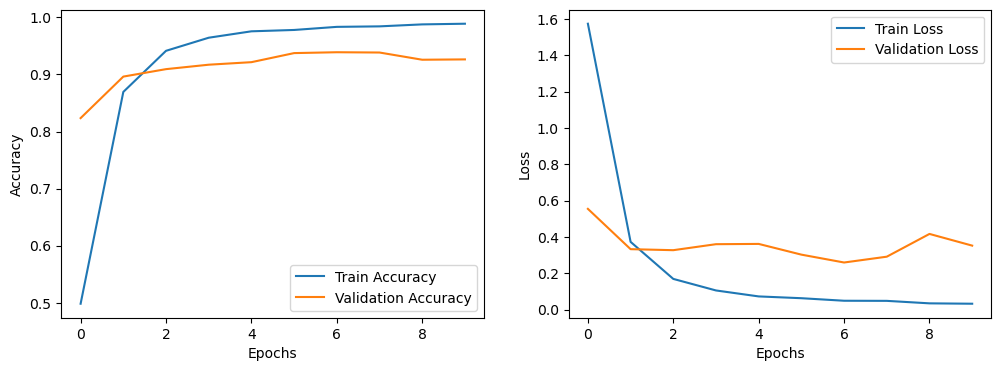

In [12]:
plt.figure(figsize=(12, 4))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Faire une recherche de meilleurs hyperparamètres avec GridSearchCV

In [13]:
# Définir le callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=0,
    restore_best_weights=True
)

model = KerasClassifier(
    model=create_cnn_model,
    epochs=10,  # Valeur par défaut que l'on pourra modifier via GridSearch
    batch_size=32,  # Valeur par défaut que l'on pourra modifier via GridSearch
    optimizer='adam',  # Valeur par défaut
    dropout_rate=0.5,  # Valeur par défaut
    verbose=0,  # Pour éviter trop de logs durant la recherche
    callbacks=[early_stopping_callback]
)

param_grid = {
    'model__neurons': [64, 128],
    'epochs': [10, 20],
    'batch_size': [32, 64, 128],
    'dropout_rate': [0.4, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Appliquer GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=3)

# Exécuter la recherche des meilleurs hyperparamètres
grid_result = grid.fit(X_train, y_train, validation_data=(X_test_balanced, y_test_balanced))

# Afficher les meilleurs paramètres trouvés et leur performance
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best accuracy: {grid_result.best_score_:.4f}")


# Évaluer les performances sur les données de test
test_loss, test_acc = grid_result.best_estimator_.model_.evaluate(X_test_balanced, y_test_balanced)
print(f'Accuracy on test set: {test_acc:.4f}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=64, optimizer=adam;, score=0.674 total time= 4.4min
[CV 2/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=64, optimizer=adam;, score=0.808 total time= 4.4min
[CV 2/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=64, optimizer=rmsprop;, score=0.814 total time= 4.4min
[CV 1/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=128, optimizer=adam;, score=0.876 total time= 4.4min
[CV 3/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=64, optimizer=rmsprop;, score=0.762 total time= 4.4min
[CV 2/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=128, optimizer=adam;, score=0.854 total time= 4.5min
[CV 1/3] END batch_size=32, dropout_rate=0.4, epochs=10, model__neurons=64, optimizer=rmsprop;, score=0.842 total time= 4.5min
[CV 3/3] END batch_size=32, dropout_rate=0.4, epochs=10, mo

## Utiliser une technique d'augmentation d'images


Epoch 1/10
 18/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0509 - loss: 3.2144 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1234 - loss: 2.8935 - val_accuracy: 0.5549 - val_loss: 1.3165
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4691 - loss: 1.5769 - val_accuracy: 0.7141 - val_loss: 0.8292
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6141 - loss: 1.0941 - val_accuracy: 0.8213 - val_loss: 0.5303
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6938 - loss: 0.8655 - val_accuracy: 0.8444 - val_loss: 0.4266
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7426 - loss: 0.7254 - val_accuracy: 0.8960 - val_loss: 0.3128
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7821 - loss: 0.6193 - val_accuracy: 0.9045 - val_loss: 0.2936
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8061 - loss: 0.5562 - val_accuracy: 0.9377 - val_loss: 0.2172
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8255 - loss: 0.4888 - val_accurac

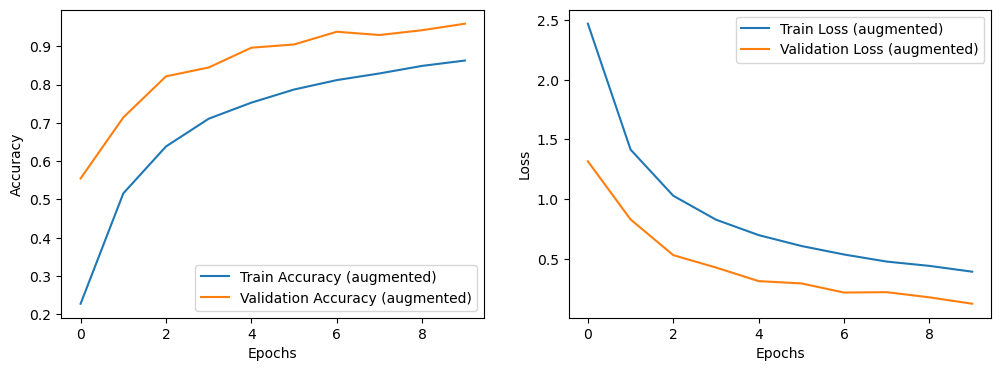

In [14]:
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotation aléatoire des images
    width_shift_range=0.1,  # Décalage horizontal
    height_shift_range=0.1, # Décalage vertical
    zoom_range=0.1,         # Zoom
    horizontal_flip=True,   # Retournement horizontal
    fill_mode='nearest'     # Remplissage des pixels manquants
)

datagen.fit(X_train)

# Définir le modèle CNN (déjà fait)
cnn_model = create_cnn_model()

# Entraîner le modèle avec les données augmentées
history_augmented = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test_balanced, y_test_balanced)
)

# Évaluer le modèle sur les données de test
test_loss_augmented, test_acc_augmented = cnn_model.evaluate(X_test_balanced, y_test_balanced)

print(f'Accuracy on test set with augmentation: {test_acc_augmented:.4f}')

# Tracer les courbes de performance (avec augmentation)
plt.figure(figsize=(12, 4))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy (augmented)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (augmented)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Train Loss (augmented)')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss (augmented)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

En Utilisant les mêmes paramètres avec l'augmentation des images on obtient des améliorations, ces améliorations étaient prévisible car cette technique est souvent recommandé quand on travail avec des datasets limités. Étant donné que les modèles de réseaux de neurones convolutifs (CNN) peuvent avoir une capacité de mémorisation élevée, exposer le modèle à une plus grande variété d'images rend les représentations apprises plus généralisées et robustes.


faire la reponse ici

## Sauvegarder votre meilleur modèle
 

In [15]:
best_model = grid_result.best_estimator_.model_

save_dir = './saved_models/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Sauvegarder le modèle
model_path = os.path.join(save_dir, 'best_cnn_model.h5')
best_model.save(model_path)
print(f'Model saved to {model_path}')

# Évaluer le modèle sur les données de test
test_loss_augmented, test_acc_augmented = best_model.evaluate(X_test_balanced, y_test_balanced)
print(f'Accuracy on test set with best model: {test_acc_augmented:.4f}')

Model saved to ./saved_models/best_cnn_model.h5
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6105 - loss: 3.0384
Accuracy on test set with best model: 0.3110


## Utiliser votre meilleur modèle avec des photos prises pour l'occasion

### Chargement du modèle pré-entraîné
Le modèle CNN pré-entraîné est chargé à partir d'un fichier .h5. Ce modèle a été sauvegardé après l'entraînement.

In [ ]:
best_model = load_model('./saved_models/best_cnn_model.h5')

### Prétraitement de l'image
Cette fonction prend en entrée le chemin d'une image, la charge en niveaux de gris, redimensionne l'image à 28x28 pixels (la taille utilisée lors de l'entraînement), normalise les valeurs des pixels, et ajuste les dimensions de l'image pour correspondre au format d'entrée du modèle.

In [ ]:
def preprocess_image(image_path):
    # Charger l'image en niveaux de gris
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Vérifier si l'image a été correctement chargée
    if img is None:
        raise FileNotFoundError(f"Image non trouvée au chemin: {image_path}")
    
    # Redimensionner l'image à la taille 28x28 (ou la taille utilisée pour l'entraînement)
    img = cv2.resize(img, (28, 28))
    
    # Normaliser les pixels (valeurs entre 0 et 1)
    img = img.astype('float32') / 255.0
    
    # Ajouter une dimension pour correspondre au format attendu par le modèle (1, 28, 28, 1)
    img = np.expand_dims(img, axis=0)  # Ajouter la dimension du batch
    img = np.expand_dims(img, axis=-1)  # Ajouter la dimension du canal (niveaux de gris)
    
    return img

### Prédiction de la lettre en langue des signes
La fonction prend le chemin d'une image en entrée, la prétraite avec la fonction précédente, puis utilise le modèle chargé pour prédire la lettre associée en langue des signes. Le résultat est renvoyé sous la forme d'un indice de classe.


In [ ]:
# Fonction pour prédire la lettre en langue des signes à partir d'une image
def predict_sign(image_path):
    # Prétraiter l'image
    processed_img = preprocess_image(image_path)
    
    # Faire une prédiction avec le modèle
    prediction = best_model.predict(processed_img)
    
    # Trouver l'indice de la classe prédite (qui correspond à une lettre)
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class

### Mapping des classes aux lettres de l'alphabet en langue des signes
Liste des classes qui correspond aux 25 lettres de l'alphabet en langue des signes.


In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 
           'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


### Affichage des images avec prédictions
Cette fonction parcourt un répertoire contenant des images, les prédit, et les affiche dans une grille. Le nombre d'images par ligne est paramétrable (par défaut, 5 par ligne).


In [ ]:
def display_images_in_grid(directory, images_per_row=5):
    image_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpeg') or f.endswith('.jpg')]  # Lister les images
    total_images = len(image_paths)  # Nombre total d'images
    rows = total_images // images_per_row + int(total_images % images_per_row != 0)  # Calcul du nombre de lignes
    
    fig, axes = plt.subplots(rows, images_per_row, figsize=(15, 15))  # Initialiser la figure et les sous-grilles
    axes = axes.flatten()  # Pour manipuler chaque subplot individuellement
    
    # Boucle sur chaque image
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour l'affichage
        
        predicted_class = predict_sign(image_path)  # Prédire la classe de l'image
        predicted_letter = classes[predicted_class[0]]  # Obtenir la lettre correspondante
        
        # Affichage de l'image avec sa prédiction
        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Lettre : {predicted_letter}")  # Affichage de la lettre prédite
        axes[i].axis('off')  # Enlever les axes pour une meilleure visibilité
    
    # Supprimer les axes vides si les sous-grilles ne sont pas utilisées
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    ##



### Spécifier le répertoire des images
Le répertoire `image_directory` contient les images à prédire. Le script affiche chaque image avec sa prédiction dans une grille.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


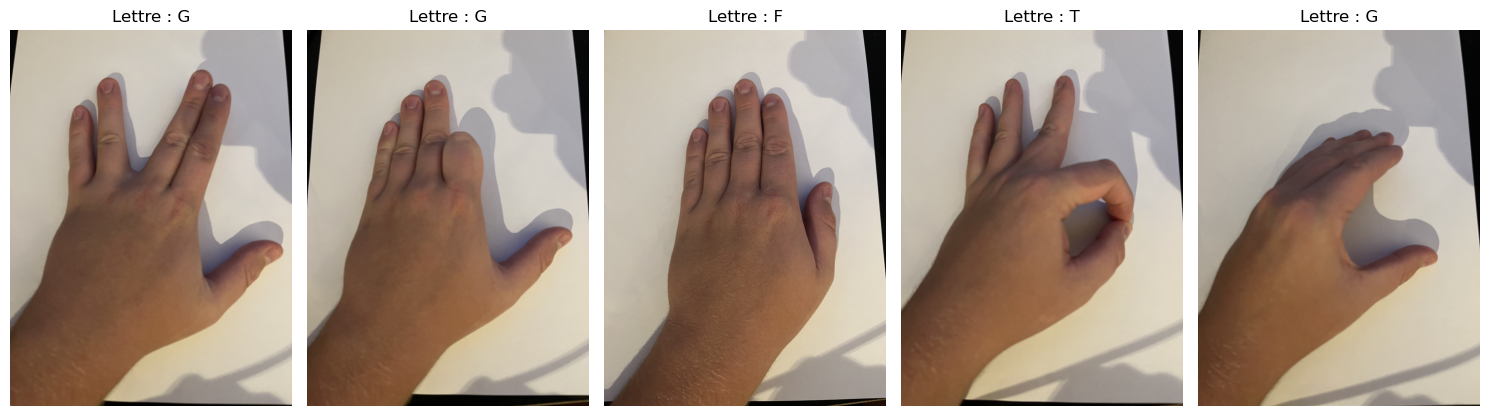

In [16]:
# Spécifier le répertoire contenant les images
image_directory = './my_hand/'

# Afficher toutes les images et les prédictions sur une grille
display_images_in_grid(image_directory)



# Choisir un des modèles pré-entrainés disponible avec Keras

Le code présenté effectue une série d'opérations pour entraîner un modèle de classification d'images en utilisant le modèle pré-entraîné MobileNetV2. 

Voici une explication détaillée du code et une interprétation des résultats obtenus :

### 1. Redimensionnement des images :


Les images d'entraînement et de test sont redimensionnées de 28x28 pixels à 32x32 pixels pour correspondre à la taille d'entrée initialement prévue pour VGG16.

Cependant, le modèle utilisé par la suite est MobileNetV2.

In [ ]:
# Redimensionner les images de 28x28 à 32x32 pour correspondre à l'entrée de VGG16
X_train_resized = tf.image.resize(X_train, [32, 32])
X_test_resized = tf.image.resize(X_test_balanced, [32, 32])

### 2. Conversion en images RGB :

Les images en niveaux de gris (1 canal) sont converties en images RGB (3 canaux) pour correspondre au format attendu par les modèles pré-entraînés sur ImageNet, qui utilisent des images en couleur.

In [ ]:
# Dupliquer le canal unique (1) à 3 canaux pour correspondre aux modèles ImageNet (input_shape=(32, 32, 3))
X_train_resized = tf.image.grayscale_to_rgb(X_train_resized)
X_test_resized = tf.image.grayscale_to_rgb(X_test_resized)

### 3. Chargement du modèle pré-entraîné MobileNetV2 :


Modèle chargé : MobileNetV2 pré-entraîné sur ImageNet.

Paramètres :
weights='imagenet' : Charge les poids pré-entraînés sur le dataset ImageNet.

include_top=False : Exclut les couches pleinement connectées à la fin du modèle.

input_shape=(32, 32, 3) : Définit la forme de l'entrée.

In [ ]:
# Charger le modèle pré-entraîné VGG16 sans la partie fully-connected
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

### 4. Construction du modèle personnalisé :

### Architecture du modèle :

- **Base** : MobileNetV2 sans les couches supérieures.

- **Couches supplémentaires** :
  - **Flatten** : Aplatie les sorties du modèle de base.
  - **Dense(128, activation='relu')** : Couche pleinement connectée avec 128 neurones.
  - **Dropout(0.5)** : Désactive aléatoirement 50% des neurones pour réduire le surapprentissage.
  - **Dense(25, activation='softmax')** : Couche de sortie pour la classification en 25 classes.


In [ ]:
model = models.Sequential()

# Ajouter le modèle pré-entrainé MobileNetV2 sans sa dernière couche
model.add(base_model)

# Ajouter une couche de flattening
model.add(layers.Flatten())

# Ajouter une couche complètement connectée
model.add(layers.Dense(128, activation='relu'))

# Ajouter une couche de dropout pour éviter le surapprentissage
model.add(layers.Dropout(0.5))

# Ajouter la couche de sortie avec 25 neurones pour 25 classes (alphabet)
model.add(layers.Dense(25, activation='softmax'))


### 5. Compilation du modèle :

- **Optimiseur** : Adam
- **Fonction de perte** : Sparse Categorical Crossentropy (adaptée pour des étiquettes entières)
- **Métrique** : Accuracy


In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 6. Entraînement du modèle :

## Données et Paramètres d'Entraînement

**Données d'entraînement**:  
`X_train_resized`, `y_train`

**Données de validation**:  
`X_test_resized`, `y_test_balanced`

**Époques**:  
10


In [ ]:
model.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test_balanced))

### 7. Évaluation du modèle :

Le modèle est évalué sur le jeu de test, et l'accuracy est affichée.

In [17]:
test_loss, test_acc = model.evaluate(X_test_resized, y_test_balanced)
print(f"Test accuracy with pre-trained model: {test_acc:.4f}")


/var/folders/y4/2xw28shj0rncxmzwdqy0c6l00000gn/T/ipykernel_44508/1421074543.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.4621 - loss: 1.9655 - val_accuracy: 0.2579 - val_loss: 4.8450
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.8957 - loss: 0.3924 - val_accuracy: 0.7960 - val_loss: 1.1673
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 57s 67ms/step - accuracy: 0.9476 - loss: 0.2343 - val_accuracy: 0.7743 - val_loss: 1.2283
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.9599 - loss: 0.1877 - val_accuracy: 0.9065 - val_loss: 0.5241
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - accuracy: 0.9681 - loss: 0.1508 - val_accuracy: 0.8292 - val_loss: 1.0462
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.9656 - loss: 0.1576 - val_accuracy: 0.9572 - val_loss: 0.2501
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.9756 - loss: 0.1157 - val_accuracy: 0.8189 - val_loss: 1.4690
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5

# Interprétation des Résultats

## Avertissement sur la Taille de l'Entrée

**Impact**:  
Utiliser des images de **32x32** au lieu de la taille minimale attendue par **MobileNetV2** peut réduire l'efficacité du transfert d'apprentissage.

**Conséquence**:  
Les poids pré-entraînés pourraient ne pas être optimaux pour cette taille, affectant potentiellement la performance du modèle.

## Performance pendant l'Entraînement

### Epoch 1:
- **Accuracy entraînement** : 46.21%
- **Loss entraînement** : 1.9655
- **Accuracy validation** : 25.79%
- **Loss validation** : 4.8450

### Epoch 10:
- **Accuracy entraînement** : 98.78%
- **Loss entraînement** : 0.0541
- **Accuracy validation** : 93.16%
- **Loss validation** : 0.5421

**Observation**:  
Le modèle a montré une amélioration significative de l'accuracy sur les données d'entraînement et de validation, atteignant une **accuracy de test de 93.16%**.

## Analyse et Suggestions

### Taille des Images

- **Problème**:  
  La taille des images est inférieure à celle attendue par **MobileNetV2**.

- **Solution**:  
  Redimensionner les images à **96x96**, **160x160**, ou **224x224** pour une meilleure compatibilité avec le modèle pré-entraîné.

### Surapprentissage

- **Observation**:  
  L'accuracy d'entraînement est très élevée, ce qui peut indiquer un surapprentissage.

- **Solutions**:
  - **Augmenter le Dropout**:  
    Ajuster le taux de dropout ou ajouter des couches supplémentaires.
  
  - **Data Augmentation**:  
    Appliquer des techniques d'augmentation des données pour améliorer la généralisation.
  
  - **Régularisation**:  
    Introduire des pénalités comme la régularisation L2.

### Utilisation du Modèle Pré-entraîné

- **Impact**:  
  Une taille d'image inadéquate peut limiter les bénéfices du transfert d'apprentissage.

- **Recommandation**:  
  Utiliser un modèle adapté aux petites résolutions ou entraîner un modèle personnalisé.

### Optimisation des Performances

- **Suggestions**:
  - **Ajuster les Hyperparamètres**:  
    Optimiser le taux d'apprentissage, le nombre d'époques, la taille des batchs.
  
  - **Explorer d'Autres Architectures**:  
    Tester différentes architectures pré-entraînées ou concevoir un modèle sur mesure.

### Conclusion :

Le code présenté utilise le transfert d'apprentissage avec MobileNetV2 pour une tâche de classification d'images en 25 classes. Bien que le modèle ait atteint une bonne accuracy de 93.16% sur le jeu de test, des ajustements tels que la taille des images et des techniques de régularisation pourraient améliorer encore ses performances et sa capacité de généralisation.